In [12]:
import sys
import os

#Ensure Python can find the Code directory
sys.path.append(os.path.abspath(".."))

import utils

In [13]:
#Use functions and packages
df = utils.load_data()
df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [14]:
#Drop duplicate rows based on the 'name' column
df_non_dup = df.drop_duplicates(subset='name')

In [15]:
df_non_dup.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,10.0,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,...,NaN,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0


In [16]:
#Calculate the range in values for 'age' column
print(df_non_dup['age'].max())
print(df_non_dup['age'].min())
df_non_dup['age'].max() - df_non_dup['age'].min()

96
18


78

In [17]:
#Use Sturges' Rule to determine an appropriate number of bins
utils.np.round(utils.np.log2(len(df_non_dup['age'])) + 1)

14.0

<Axes: xlabel='age', ylabel='Count'>

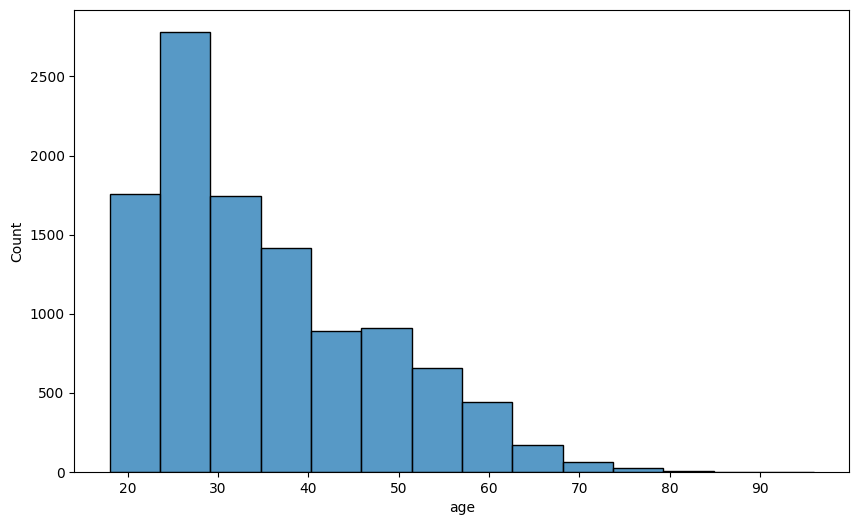

In [18]:
#Visualize the age distribution
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup['age'], bins = 14)

In [19]:
#Create a table that contains the count for each bin
age_bins = utils.pd.cut(df_non_dup['age'], bins=14)
age_bins_table = age_bins.value_counts().reset_index()
age_bins_table.sort_values('age')

,age,count
1,"(17.922, 23.571]",1756
0,"(23.571, 29.143]",2783
2,"(29.143, 34.714]",1744
3,"(34.714, 40.286]",1412
5,"(40.286, 45.857]",891
4,"(45.857, 51.429]",912
6,"(51.429, 57.0]",762
7,"(57.0, 62.571]",335
8,"(62.571, 68.143]",172
9,"(68.143, 73.714]",60


Text(0.5, 1.0, 'Risk of Recidivism by Age')

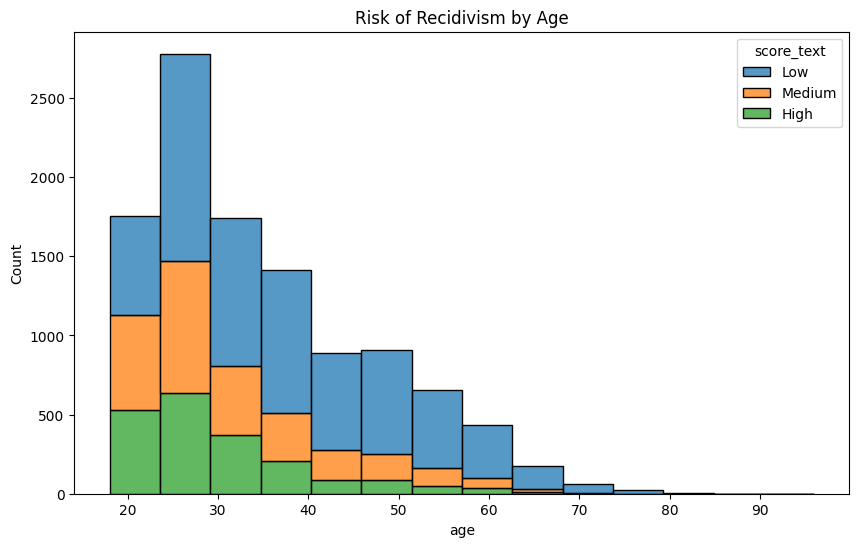

In [20]:
#Visualize the age distribution with 'score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='score_text', bins=14, multiple='stack')
utils.plt.title('Risk of Recidivism by Age')

In [21]:
#Count the values of each 'score_text' for each 'age' bin
age_score_table = df_non_dup.groupby([age_bins, 'score_text'], observed=True)['name'].count().reset_index()
age_score_table.columns = ['age', 'score_text', 'count_score']
age_score_table

,age,score_text,count_score
0,"(17.922, 23.571]",High,530
1,"(17.922, 23.571]",Low,626
2,"(17.922, 23.571]",Medium,599
3,"(23.571, 29.143]",High,637
4,"(23.571, 29.143]",Low,1311
5,"(23.571, 29.143]",Medium,832
6,"(29.143, 34.714]",High,371
7,"(29.143, 34.714]",Low,936
8,"(29.143, 34.714]",Medium,437
9,"(34.714, 40.286]",High,207


Text(0.5, 1.0, 'Risk of Violence by Age')

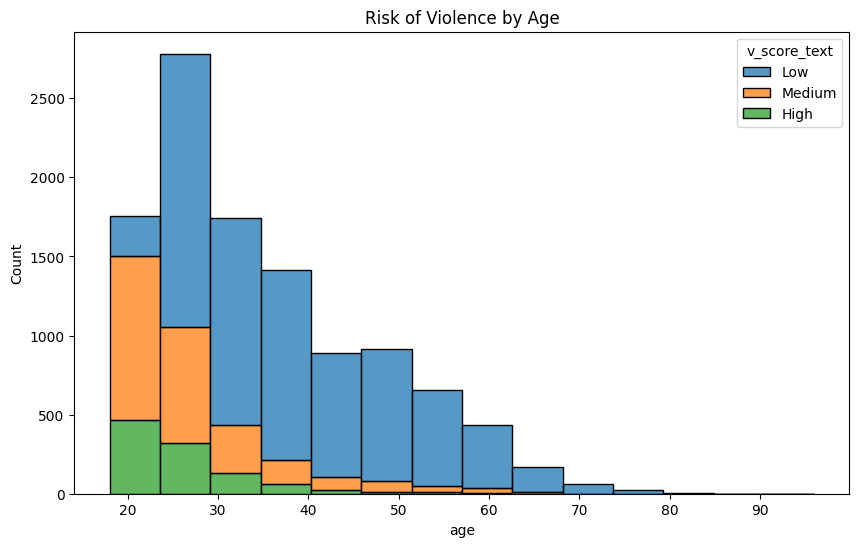

In [22]:
#Visualize the age distribution with 'v_score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='v_score_text', bins=14, multiple='stack')
utils.plt.title('Risk of Violence by Age')

In [23]:
#Count the values of each 'v_score_text' for each 'age' bin
age_v_score_table = df_non_dup.groupby([age_bins, 'v_score_text'], observed=True)['name'].count().reset_index()
age_v_score_table.columns = ['age', 'v_score_text', 'count_v_score']
age_v_score_table

,age,v_score_text,count_v_score
0,"(17.922, 23.571]",High,467
1,"(17.922, 23.571]",Low,256
2,"(17.922, 23.571]",Medium,1033
3,"(23.571, 29.143]",High,322
4,"(23.571, 29.143]",Low,1729
5,"(23.571, 29.143]",Medium,730
6,"(29.143, 34.714]",High,130
7,"(29.143, 34.714]",Low,1308
8,"(29.143, 34.714]",Medium,306
9,"(34.714, 40.286]",High,60


Text(0.5, 1.0, 'Race by Age')

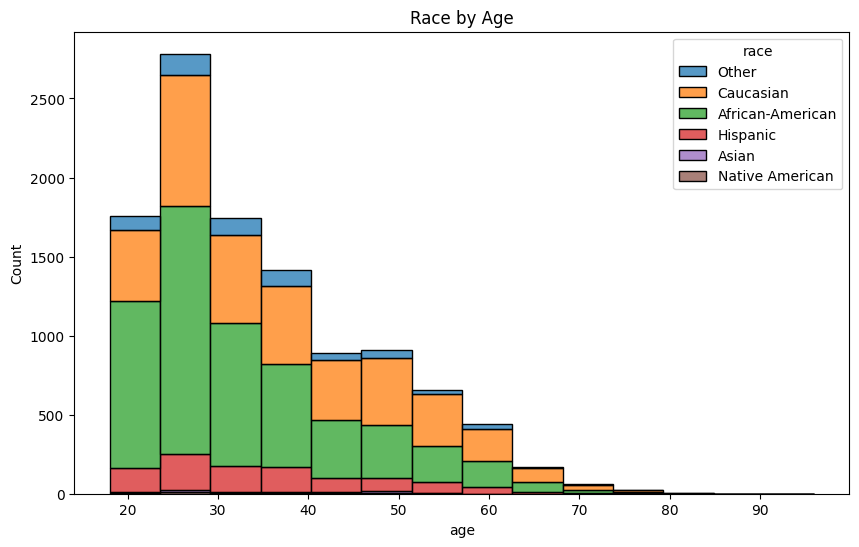

In [24]:
#Visualize the age distribution with 'race'
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='race', bins=14, multiple='stack')
utils.plt.title('Race by Age')

In [26]:
#Count the values of each 'race' for each 'age' bin
age_race_table = df_non_dup.groupby([age_bins, 'race'], observed=True)['name'].count().reset_index()
age_race_table.columns = ['age', 'race', 'count']
age_race_table

,age,race,count
0,"(17.922, 23.571]",African-American,1057
1,"(17.922, 23.571]",Asian,6
2,"(17.922, 23.571]",Caucasian,449
3,"(17.922, 23.571]",Hispanic,152
4,"(17.922, 23.571]",Native American,5
...,...,...,...
59,"(73.714, 79.286]",Caucasian,16
60,"(73.714, 79.286]",Hispanic,1
61,"(79.286, 84.857]",Caucasian,2
62,"(79.286, 84.857]",Hispanic,1
